In [11]:
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from scipy.sparse import diags
import scipy
import scipy.optimize
np.random.seed(0)
import warnings
warnings.filterwarnings("ignore")

In [12]:
from oracles import QuadraticOracle
from optimization import lbfgs, conjugate_gradients

In [13]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']

In [14]:
def generate(n):
  A = np.random.uniform(0, 20, size=(n, n))
  A = (A + A.T) / 2
  b = np.random.uniform(0, 10, size=n)
  return A, b, QuadraticOracle(A, b)

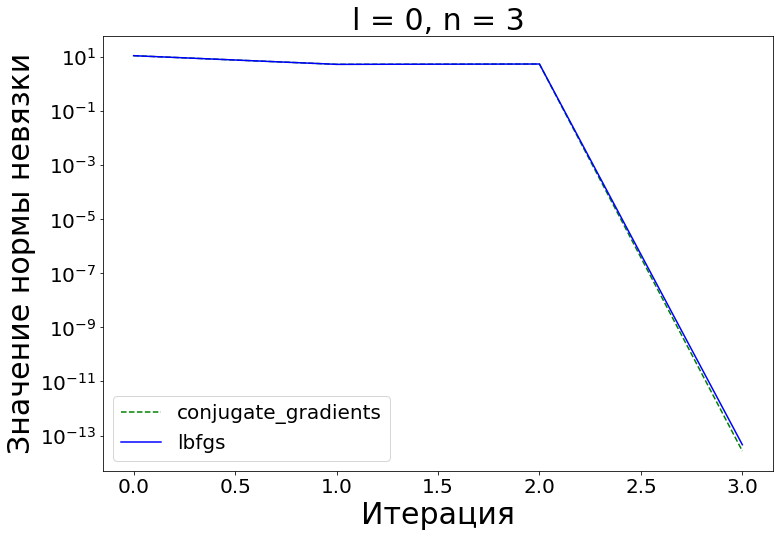

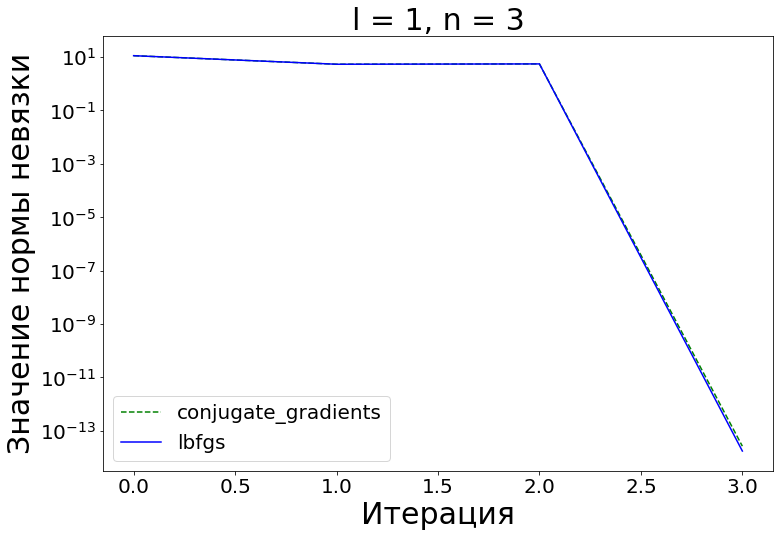

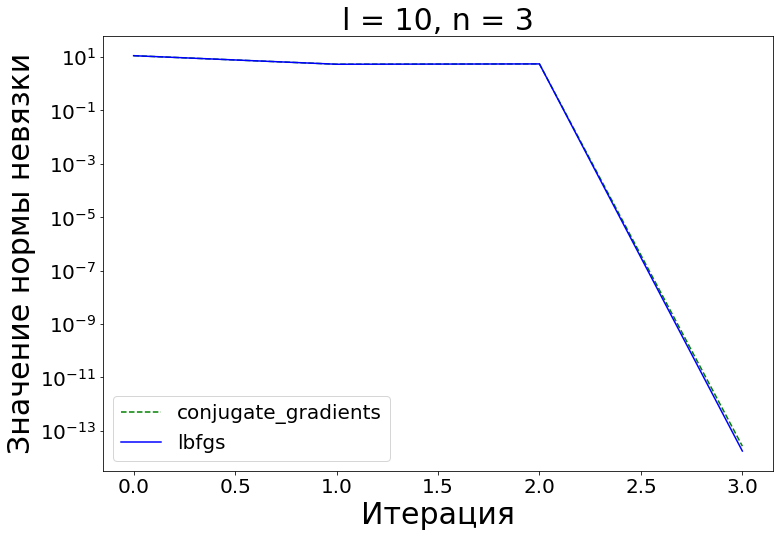

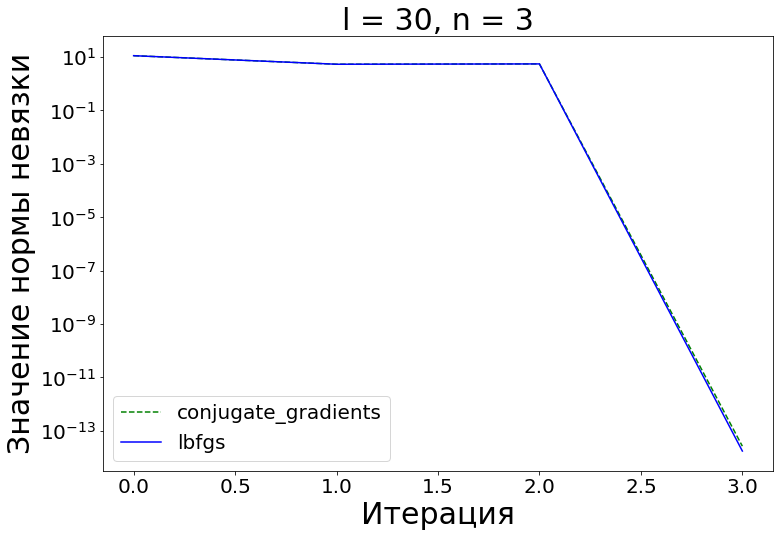

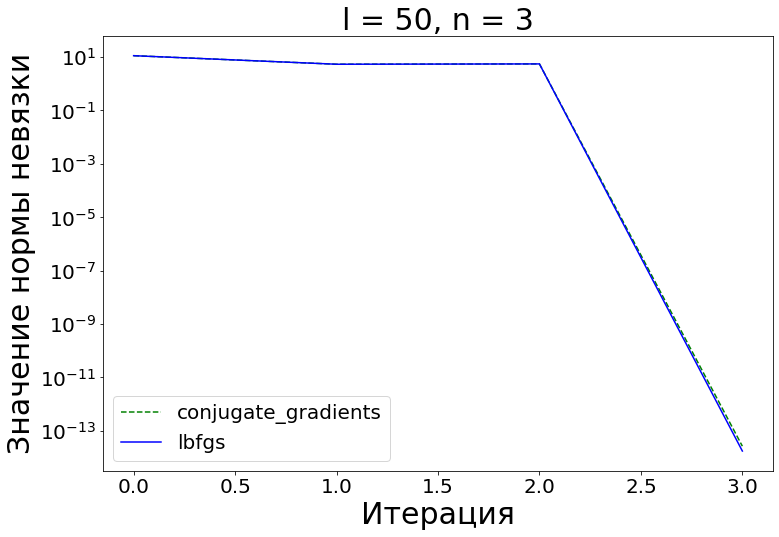

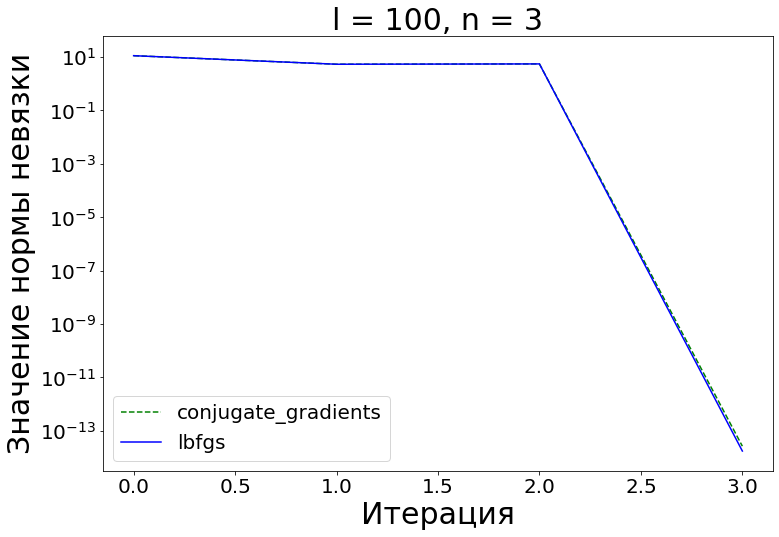

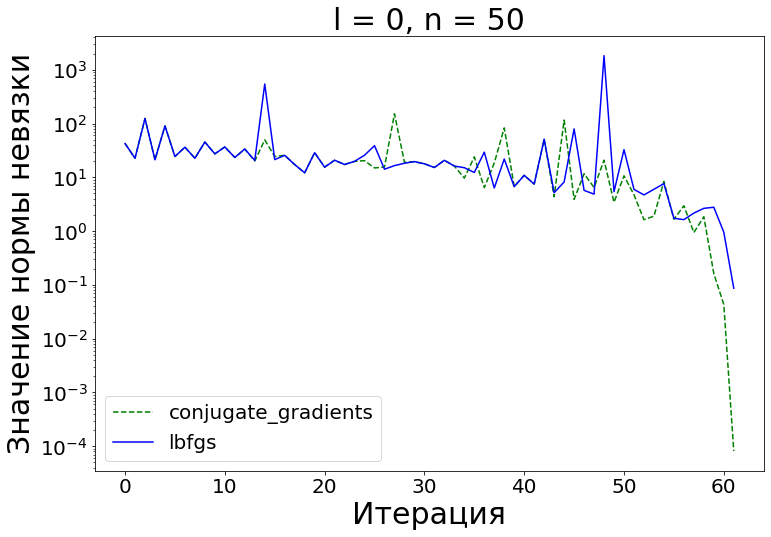

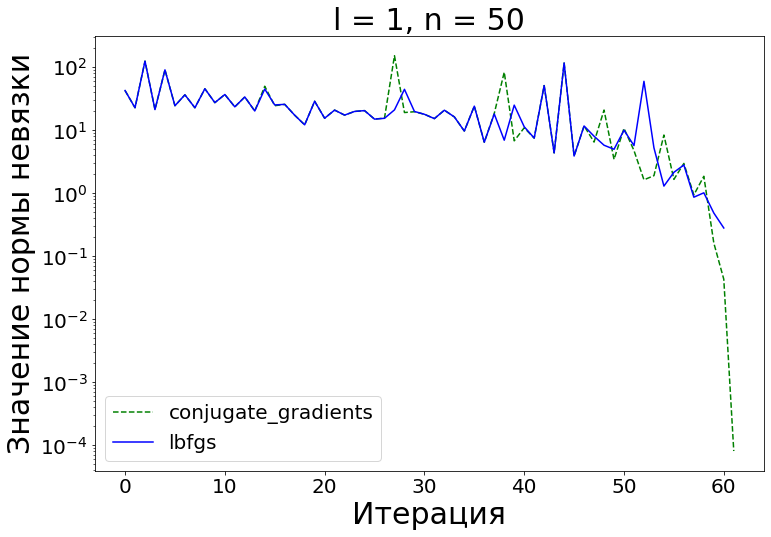

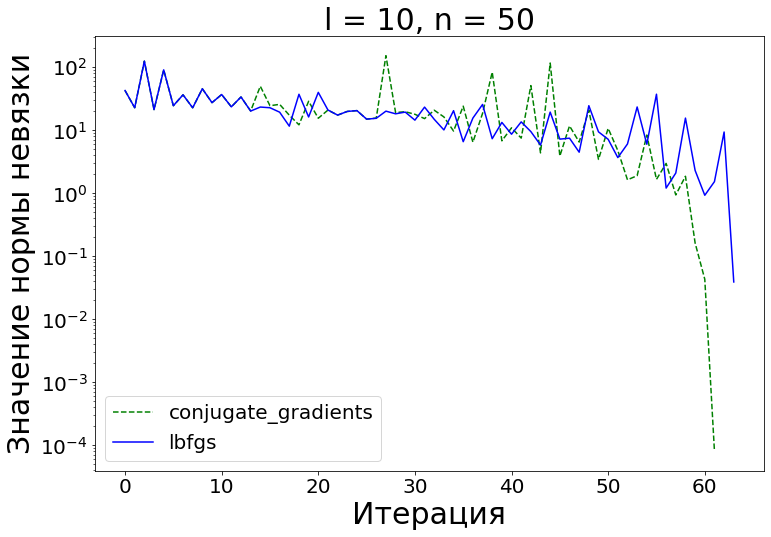

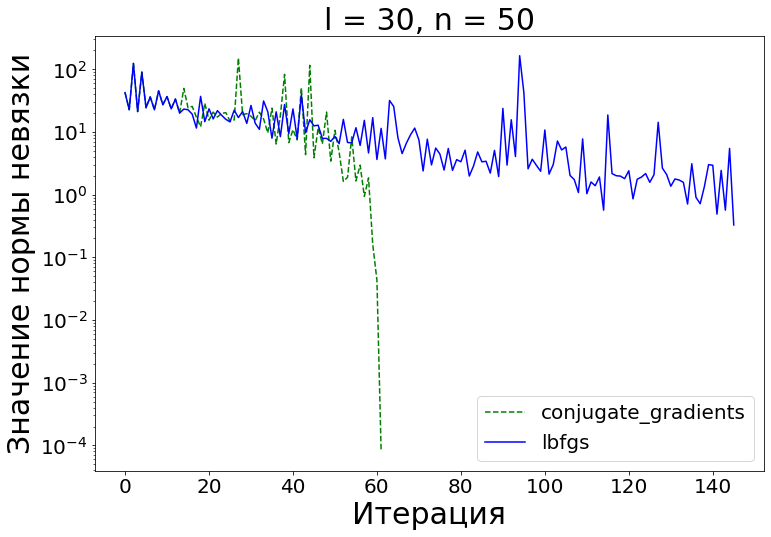

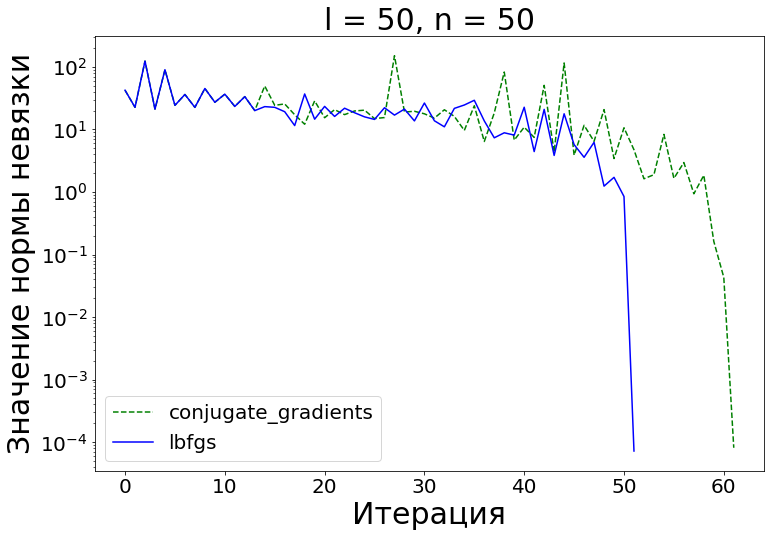

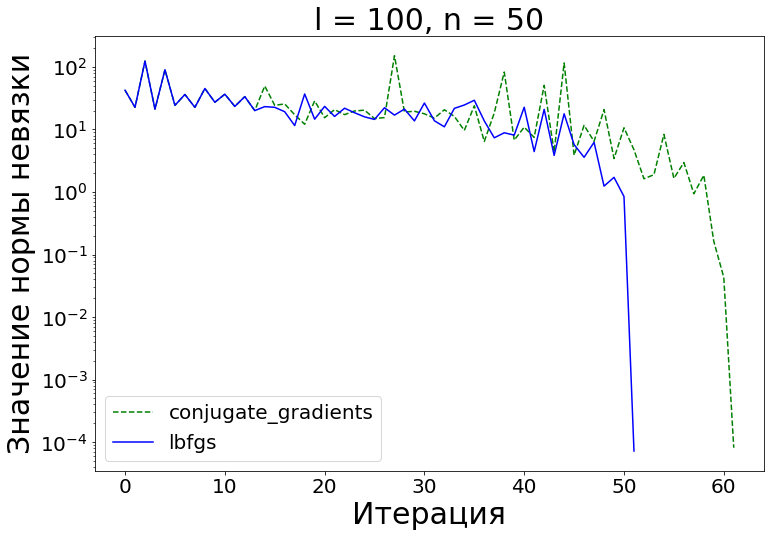

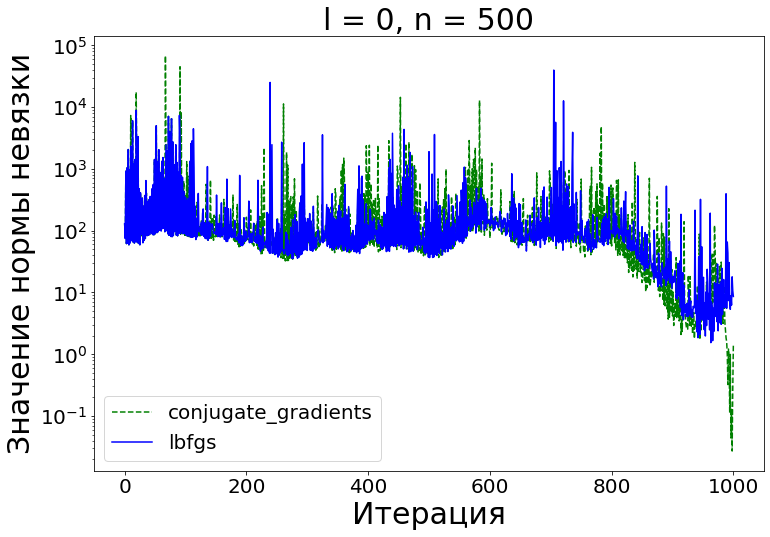

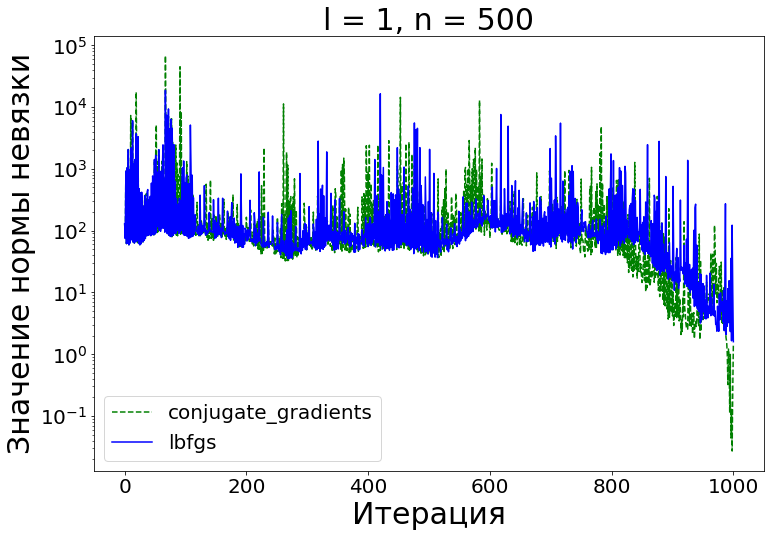

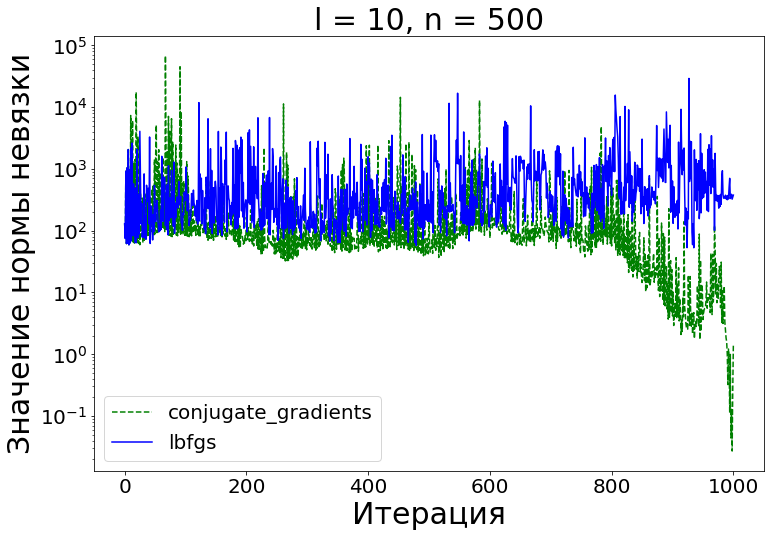

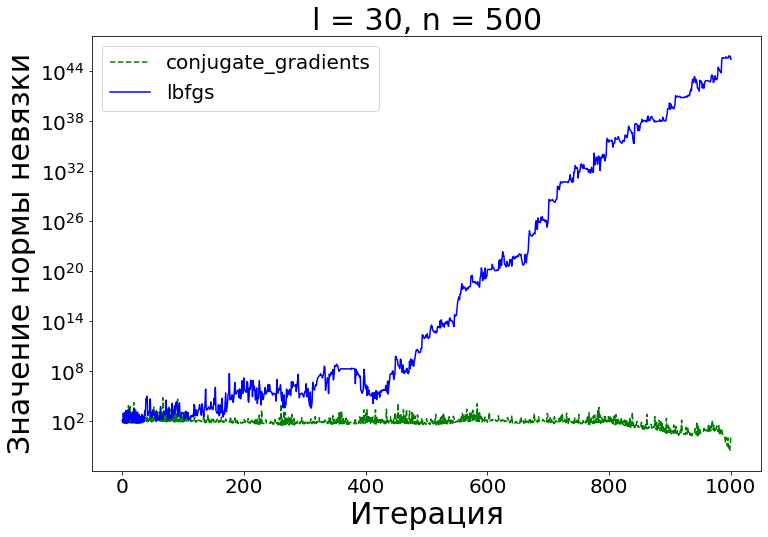

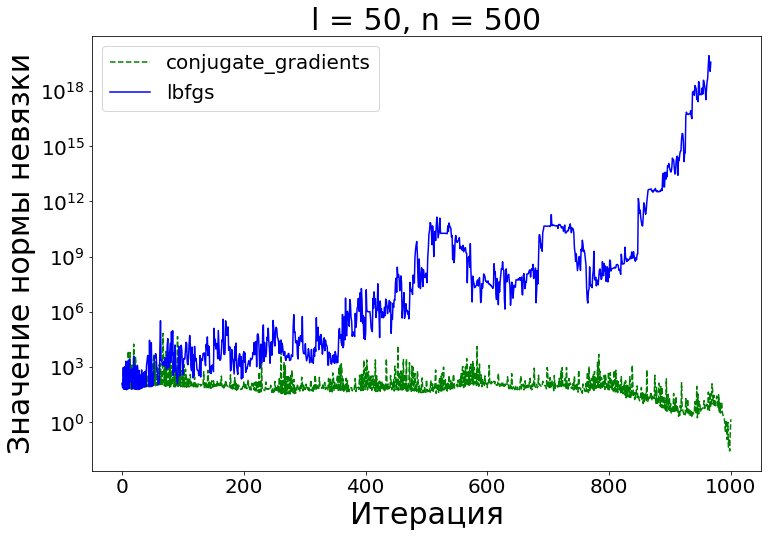

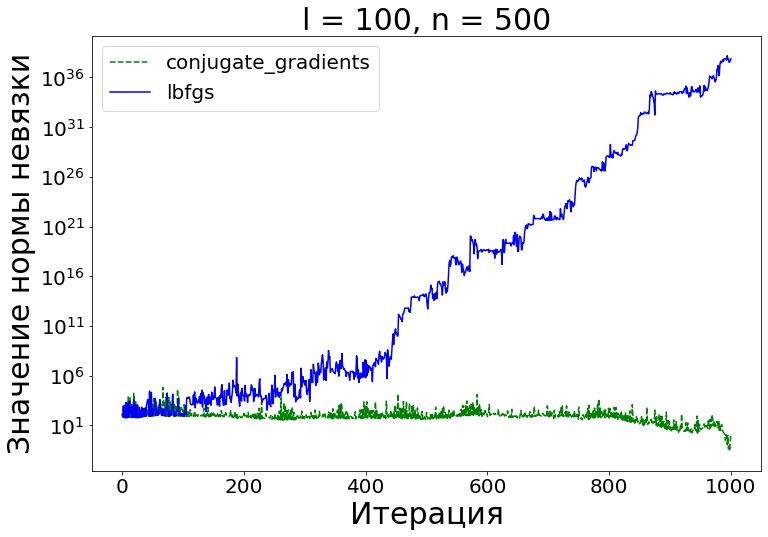

In [26]:
j=0
n_arr = [3, 50, 500]
for i in range(3):
  n = n_arr[i]
  x_0 = np.zeros(n)
  A, b, oracle = generate(n)

  for l in [0, 1, 10, 30, 50, 100]:
    j+=1
    fig, ax = plt.subplots(figsize=(12, 8))
    hist1 = conjugate_gradients(lambda v: A.dot(v), b, x_0, trace=True)[2]
    hist2 = lbfgs(oracle, x_0, trace=True, line_search_options={'method': 'Best'}, memory_size=l, max_iter=1000)[2]
    plt.yscale('log')
    plt.plot(hist1['residual_norm'], linestyle = '--', color='green', label='conjugate_gradients')
    plt.plot(hist2['grad_norm'], linestyle = '-', color='blue', label='lbfgs')
    plt.xlabel('Итерация', fontsize=30)
    plt.ylabel('Значение нормы невязки', fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=20)
    name=str(j)
    plt.title(label=f'l = {l}, n = {n}', fontsize=30)
    plt.savefig(name, bbox_inches="tight")
    plt.show()